# Importing dataset and libs

In [114]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

replays = pd.read_csv('../data/starcraft.csv')

In [115]:
replays.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


# Cleaning

In [116]:
# deleting one row with 1 million hours of playtime
replays.loc[replays['TotalHours'] > 800000, 'TotalHours'] = 10000

replays.dropna(inplace=True)
replays.isnull().values.any()

# Replacing league numbers with string    
leagues = {
        1: "Bronze",
        2: "Silver",
        3: "Gold",
        4: "Diamond",
        5: "Master",
        6: "Grandmaster",
        7: "Prof1",
        8: "Prof2",
    }
replays['LeagueIndex'] = replays['LeagueIndex'].apply(lambda x: leagues.get(x)) 

leagueIndexOrderList = ['Bronze', 'Silver', 'Gold', 'Diamond', 'Master', 'GrandMaster', 'Prof'] 
replays.reindex(leagueIndexOrderList)

replays.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,Master,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,Master,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,Diamond,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,Gold,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,Gold,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


## LeagueIndex spread

Text(0,0.5,'Amount of replays')

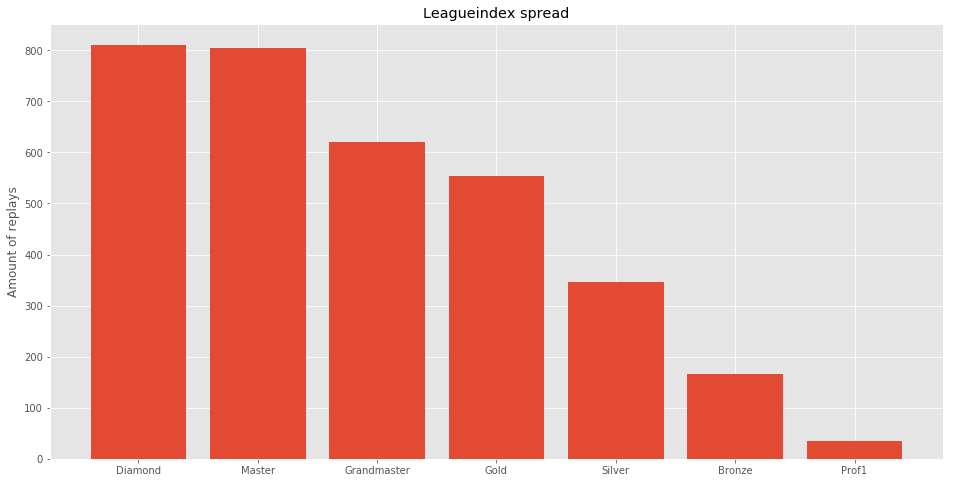

In [117]:
plt.figure(figsize=(16, 8));

leagueCounts = replays['LeagueIndex'].value_counts()

labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

# print(leagueCounts)
# print(replays.groupby('LeagueIndex').count())

plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)

plt.title('Leagueindex spread')
plt.ylabel('Amount of replays')


## Combining LeagueIndexes

['Master' 'Diamond' 'Gold' 'Silver' 'Grandmaster']


Text(0,0.5,'Amount of replays')

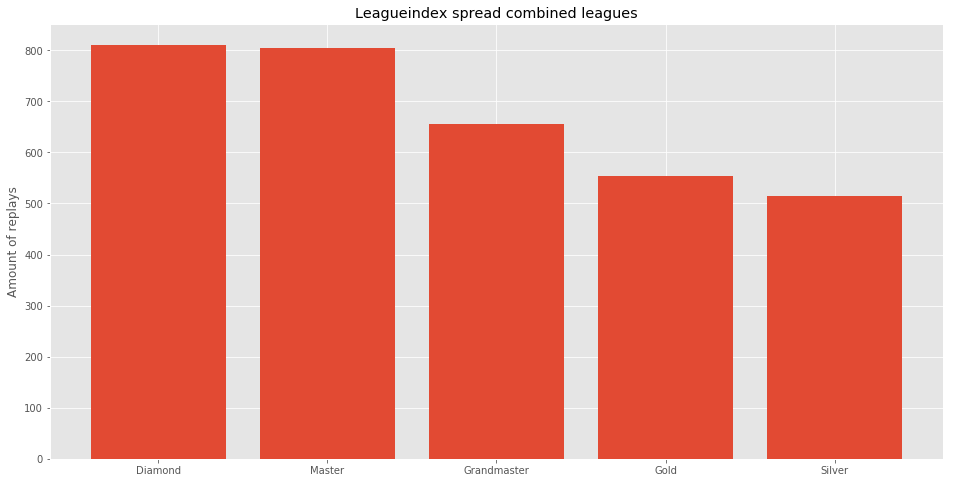

In [119]:
replays.loc[replays['LeagueIndex'] == 'Bronze', 'LeagueIndex'] = 'Silver'
replays.loc[replays['LeagueIndex'] == 'Prof1', 'LeagueIndex'] = 'Grandmaster'

print(replays['LeagueIndex'].unique())

leagueCounts = replays['LeagueIndex'].value_counts()
labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

plt.figure(figsize=(16, 8));
plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)
plt.title('Leagueindex spread combined leagues')
plt.ylabel('Amount of replays')

# Plotting LeagueIndex against oter features

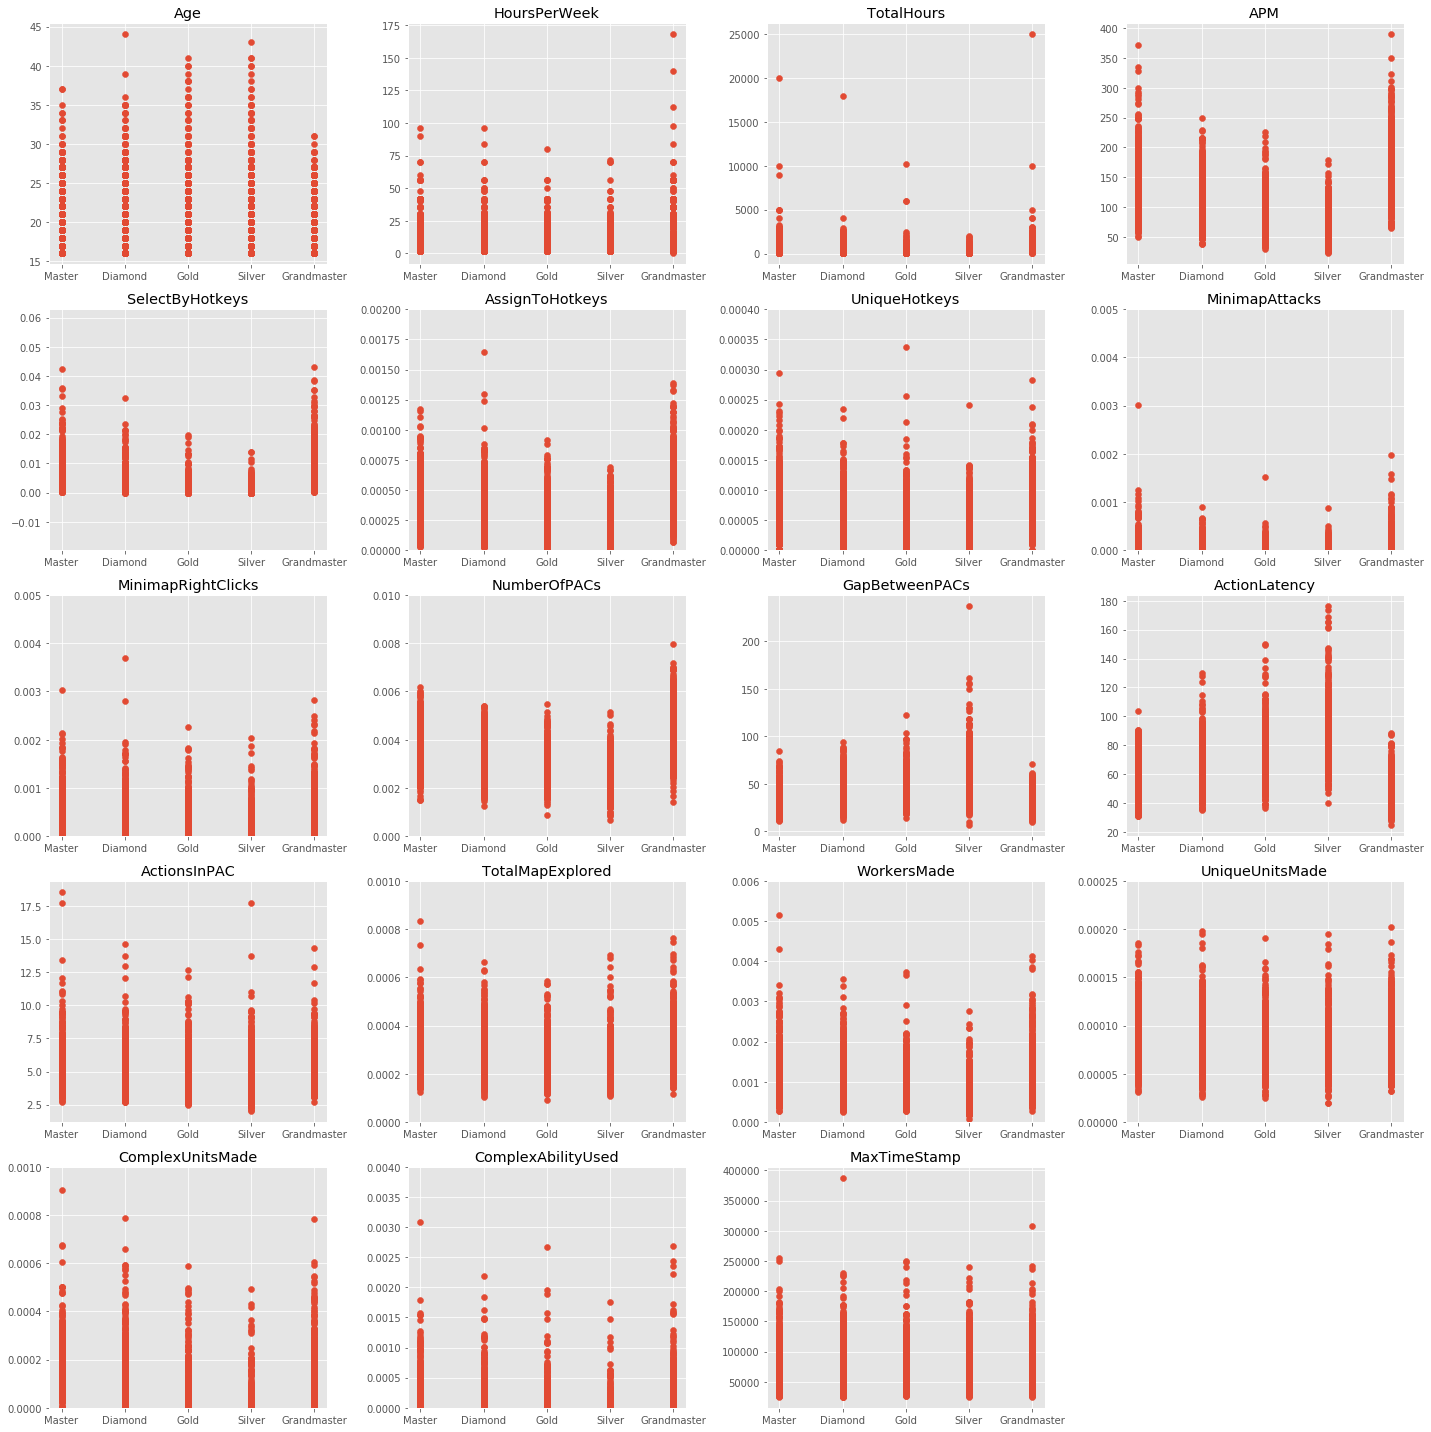

In [120]:
plt.figure(figsize=(20, 20));

plt.subplot(5, 4, 1)
plt.title('Age')
plt.scatter(replays.LeagueIndex, replays.Age)

plt.subplot(5, 4, 2)
plt.title('HoursPerWeek')
plt.scatter(replays.LeagueIndex, replays.HoursPerWeek)

plt.subplot(5, 4, 3)
plt.title('TotalHours')
plt.scatter(replays.LeagueIndex, replays.TotalHours)

plt.subplot(5, 4, 4)
plt.title('APM')
plt.scatter(replays.LeagueIndex, replays.APM)

plt.subplot(5, 4, 5)
plt.title('SelectByHotkeys')
plt.scatter(replays.LeagueIndex, replays.SelectByHotkeys)

plt.subplot(5, 4, 6)
plt.title('AssignToHotkeys')
plt.ylim([0.0,0.002])
plt.scatter(replays.LeagueIndex, replays.AssignToHotkeys)

plt.subplot(5, 4, 7)
plt.title('UniqueHotkeys')
plt.ylim([0.0,0.0004])
plt.scatter(replays.LeagueIndex, replays.UniqueHotkeys)

plt.subplot(5, 4, 8)
plt.title('MinimapAttacks')
plt.ylim([0.0,0.005])
plt.scatter(replays.LeagueIndex, replays.MinimapAttacks)

plt.subplot(5, 4, 9)
plt.title('MinimapRightClicks')
plt.ylim([0.0,0.005])
plt.scatter(replays.LeagueIndex, replays.MinimapRightClicks)

plt.subplot(5, 4, 10)
plt.title('NumberOfPACs')
plt.ylim([0.0,0.010])
plt.scatter(replays.LeagueIndex, replays.NumberOfPACs)

plt.subplot(5, 4, 11)
plt.title('GapBetweenPACs')
plt.scatter(replays.LeagueIndex, replays.GapBetweenPACs)

plt.subplot(5, 4, 12)
plt.title('ActionLatency')
plt.scatter(replays.LeagueIndex, replays.ActionLatency)

plt.subplot(5, 4, 13)
plt.title('ActionsInPAC')
plt.scatter(replays.LeagueIndex, replays.ActionsInPAC)

plt.subplot(5, 4, 14)
plt.title('TotalMapExplored')
plt.ylim([0.0,0.001])
plt.scatter(replays.LeagueIndex, replays.TotalMapExplored)

plt.subplot(5, 4, 15)
plt.title('WorkersMade')
plt.ylim([0.0,0.006])
plt.scatter(replays.LeagueIndex, replays.WorkersMade)

plt.subplot(5, 4, 16)
plt.title('UniqueUnitsMade')
plt.ylim([0.0,0.00025])
plt.scatter(replays.LeagueIndex, replays.UniqueUnitsMade)

plt.subplot(5, 4, 17)
plt.title('ComplexUnitsMade')
plt.ylim([0.0,0.001])
plt.scatter(replays.LeagueIndex, replays.ComplexUnitsMade)

plt.subplot(5, 4, 18)
plt.title('ComplexAbilityUsed')
plt.ylim([0.0,0.004])
plt.scatter(replays.LeagueIndex, replays.ComplexAbilityUsed)

plt.subplot(5, 4, 19)
plt.title('MaxTimeStamp')
plt.scatter(replays.LeagueIndex, replays.MaxTimeStamp)

plt.tight_layout()

# Algorithms

## Splitting into train and test

In [142]:
# train, test = train_test_split(replays, test_size=0.2)
test_size = 0.2

l_silver = replays.loc[replays['LeagueIndex'] == 'Silver']
l_gold = replays.loc[replays['LeagueIndex'] == 'Gold']
l_diamond = replays.loc[replays['LeagueIndex'] == 'Diamond']
l_master = replays.loc[replays['LeagueIndex'] == 'Master']
l_grandmaster = replays.loc[replays['LeagueIndex'] == 'Grandmaster']


train_silver, test_silver = train_test_split(l_silver, test_size=test_size)
train_gold, test_gold = train_test_split(l_gold, test_size=test_size)
train_diamond, test_diamond = train_test_split(l_diamond, test_size=test_size)
train_master, test_master = train_test_split(l_master, test_size=test_size)
train_grandmaster, test_grandmaster = train_test_split(l_grandmaster, test_size=test_size)

frames_train = [train_silver, train_gold, train_diamond, train_master, train_grandmaster]
frames_test = [test_silver, test_gold, test_diamond, test_master, test_grandmaster]

train = pd.concat(frames_train)
test = pd.concat(frames_test)


## Getting features

In [ ]:
leagueIndex = train.LeagueIndex.values
f1 = train.Age.values
f2 = train.HoursPerWeek.values
f3 = train.TotalHours.values
f4 = train.SelectByHotkeys.values
f5 = train.AssignToHotkeys.values
f6 = train.UniqueHotkeys.values
f7 = train.MinimapAttacks.values
f8 = train.MinimapRightClicks.values
f9 = train.NumberOfPACs.values
f10 = train.GapBetweenPACs.values
f11 = train.ActionLatency.values
f12 = train.ActionsInPAC.values
f13 = train.TotalMapExplored.values
f14 = train.WorkersMade.values
f15 = train.UniqueUnitsMade.values
f16 = train.ComplexUnitsMade.values
f17 = train.ComplexAbilityUsed.values
f18 = train.MaxTimeStamp.values

leagueIndex_test = test.LeagueIndex.values
f1_test = test.Age.values
f2_test = test.HoursPerWeek.values
f3_test = test.TotalHours.values
f4_test = test.SelectByHotkeys.values
f5_test = test.AssignToHotkeys.values
f6_test = test.UniqueHotkeys.values
f7_test = test.MinimapAttacks.values
f8_test = test.MinimapRightClicks.values
f9_test = test.NumberOfPACs.values
f10_test = test.GapBetweenPACs.values
f11_test = test.ActionLatency.values
f12_test = test.ActionsInPAC.values
f13_test = test.TotalMapExplored.values
f14_test = test.WorkersMade.values
f15_test = test.UniqueUnitsMade.values
f16_test = test.ComplexUnitsMade.values
f17_test = test.ComplexAbilityUsed.values
f18_test = test.MaxTimeStamp.values

## Linear Support Vector Machines

In [143]:
featuers_train = np.array(list(zip(f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f18)))
labels_train = np.array(list(leagueIndex))

features_test = np.array(list(zip(f1_test, f2_test, f3_test, f4_test, f5_test, f6_test, f7_test, f8_test, f9_test, f10_test, f11_test, f12_test, f13_test, f14_test, f14_test, f15_test, f16_test, f17_test, f18_test)))
labels_test = np.array(list(leagueIndex_test))

clf = SVC(random_state=0, tol=1e-5)
clf.fit(featuers_train, labels_train)

pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print(acc)


0.24328358208955222
